<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Features" data-toc-modified-id="Features-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Features</a></span></li><li><span><a href="#Methodology" data-toc-modified-id="Methodology-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Methodology</a></span></li><li><span><a href="#Code" data-toc-modified-id="Code-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Code</a></span><ul class="toc-item"><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Import Libraries</a></span></li><li><span><a href="#Data-ingestion-and-storage" data-toc-modified-id="Data-ingestion-and-storage-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Data ingestion and storage</a></span></li><li><span><a href="#Data-summarization" data-toc-modified-id="Data-summarization-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Data summarization</a></span></li><li><span><a href="#Data-cleaning-and-preprocessing" data-toc-modified-id="Data-cleaning-and-preprocessing-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Data cleaning and preprocessing</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Modeling</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#References:" data-toc-modified-id="References:-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>References:</a></span></li></ul></div>

# Kaggle Cases : Project - 1 : Regression

The competition dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this playground competition. Based on individual trip attributes, participants should predict the duration of each trip in the test set.

The link to the dataset can be found in the references[1]


## Introduction

In this competition, Kaggle is challenging us to build a model that predicts the total ride duration of taxi trips in New York City. Our primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables. 

The aim of the project is to carry out detailed data analysis and modeling on the NYC cab data as a regression task and predict the total ride duration of Taxi trips in New York City.


## Features

id - a unique identifier for each trip

vendor_id - a code indicating the provider associated with the trip record

pickup_datetime - date and time when the meter was engaged

dropoff_datetime - date and time when the meter was disengaged

passenger_count - the number of passengers in the vehicle (driver entered value)

pickup_longitude - the longitude where the meter was engaged

pickup_latitude - the latitude where the meter was engaged

dropoff_longitude - the longitude where the meter was disengaged

dropoff_latitude - the latitude where the meter was disengaged

store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip

trip_duration - duration of the trip in seconds


## Methodology 


1. Data ingestion and storage 

2. Data summarization

3. Data cleaning and prcoessing

4. Data visulaization 


## Code

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Data ingestion and storage

Data is downloaded from the link shared on the canvas for the Project.
Then its loaded as a Dataframe object, using the Pandas library in Python.


In [2]:
# read the training data
df_train = pd.read_csv('./data/train.csv')

# read the test data
df_test = pd.read_csv('./data/test.csv')


In [3]:
print('Dimension : ', df_train.shape, '\n')
df_train.head()

Dimension :  (1458644, 11) 



,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [4]:
print('Dimension : ', df_test.shape, '\n')
df_test.head()

Dimension :  (625134, 9) 



,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


### Data summarization

Below we look at the data, each column names the count of the rows. We also describe partcular columns that we are interested in using the describe function and finally select multiple columns from all the columns.

In [5]:
# columns information
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [6]:
# columns statistical summary
df_train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [7]:
for i in df_train.columns:
    print(str(i) + ' : ' +str(len(df_train[i].unique())))

id : 1458644
vendor_id : 2
pickup_datetime : 1380222
dropoff_datetime : 1380377
passenger_count : 10
pickup_longitude : 23047
pickup_latitude : 45245
dropoff_longitude : 33821
dropoff_latitude : 62519
store_and_fwd_flag : 2
trip_duration : 7417


### Data cleaning and preprocessing

Here we do a bit of data cleaning.

First we look at all the missing values in the data


In [8]:
# checking for null values
print(df_train.isnull().sum())

# Note - We see that there are no null values and so need for imputations

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64


In [9]:
# convert the date and time to datetime format for modeling purpose

# training data
df_train['pickup_datetime'] = pd.to_datetime(df_train['pickup_datetime'])
df_train['dropoff_datetime'] = pd.to_datetime(df_train['dropoff_datetime'])

# testing data
df_test['pickup_datetime'] = pd.to_datetime(df_test['pickup_datetime'])


In [10]:
# Next we split the date to day month year hour minute and second

# training data
df_train['year_pickup'] = df_train['pickup_datetime'].dt.year
df_train['month_pickup'] = df_train['pickup_datetime'].dt.month
df_train['day_pickup'] = df_train['pickup_datetime'].dt.day
df_train['hour_pickup'] = df_train['pickup_datetime'].dt.hour
df_train['weekday_pickup'] = df_train['pickup_datetime'].dt.weekday
df_train['minute_pickup'] = df_train['pickup_datetime'].dt.minute
df_train['second_pickup'] = df_train['pickup_datetime'].dt.second


In [11]:
# testing data 

df_test['year_pickup'] = df_test['pickup_datetime'].dt.year
df_test['month_pickup'] = df_test['pickup_datetime'].dt.month
df_test['day_pickup'] = df_test['pickup_datetime'].dt.day
df_test['hour_pickup'] = df_test['pickup_datetime'].dt.hour
df_test['weekday_pickup'] = df_test['pickup_datetime'].dt.weekday + 1
df_test['minute_pickup'] = df_test['pickup_datetime'].dt.minute
df_test['second_pickup'] = df_test['pickup_datetime'].dt.second

In [12]:
df_train['month_pickup'].value_counts()

# we see we have data for 6 months totally and the rides are almost same for each month

3    256189
4    251645
5    248487
2    238300
6    234316
1    229707
Name: month_pickup, dtype: int64

In [13]:
df_train['year_pickup'].value_counts()

# the year is same throughout can be dropped

2016    1458644
Name: year_pickup, dtype: int64

In [14]:
df_train['hour_pickup'].value_counts()[:10]

# here we can see that highest number of rides are being taken after 6 pm - night time taxi rides are preferred.

18    90600
19    90308
21    84185
20    84072
22    80492
17    76483
14    74292
12    71873
15    71811
13    71473
Name: hour_pickup, dtype: int64

### Exploratory Data Analysis


<AxesSubplot:xlabel='vendor_id'>

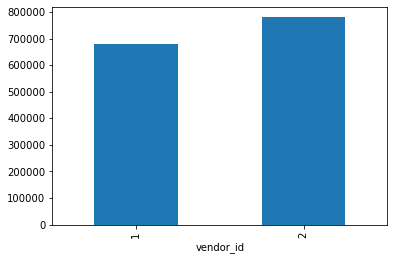

In [15]:
# vendors

p1 = df_train.groupby(['vendor_id']).count()['id']

#p1.plot.bar(x='vendor_id', xlabel = 'Vendors', figsize=(8, 6))
p1.plot(kind = 'bar')

# Note : BMI also states that higher the BMI higer chance of being diabetic

Text(0, 0.5, 'Trips')

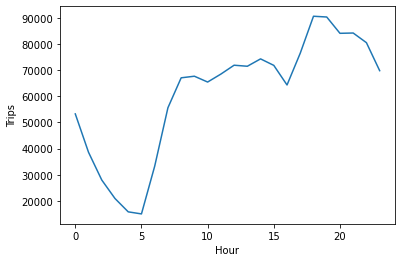

In [16]:
#p2 = df_train['hour_pickup'].value_counts().rename_axis('hour').to_frame('counts')

p2 = pd.DataFrame(df_train.hour_pickup.value_counts().reset_index())
p2.columns = ['hour', 'trips']
p2 = p2.sort_values(by=['hour'])

plt.plot(p2.hour, p2.trips)
plt.xlabel('Hour')
plt.ylabel('Trips')

## We see that the highest trips are around 16 to 20 hours which is from 4 pm to 8 pm.

### Modeling

In [17]:
# Create the labels and predictor - X and Y
# Dropping trip_duration and id
X = df_train.drop(labels = ["trip_duration", "id", 'pickup_datetime', 'dropoff_datetime', 'year_pickup', 'store_and_fwd_flag'],axis = 1)


In [18]:
#Scale variables

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
Y_scaled = np.log1p(df_train['trip_duration'])

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)

In [21]:
#Model with XGBoost
import xgboost as xgb
xgb_mod = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 60, verbosity =0)


#randf = RandomForestRegressor(n_estimators = 50, max_features = 'auto', max_depth = 5)
# model fitting
xgb_mod.fit(X_train, y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=60, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)

In [24]:
xgb_mod.score(X_test, y_test)

0.3123507907908626

In [23]:
# predictions and training accuracy
from sklearn.metrics import mean_squared_error

preds = xgb_mod.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.660585


In [ ]:
# testing phase
X_test = df_test[list(X.columns)]

y_pred = randf.predict(X_test)
y_pred.mean(), len(y_pred)

In [ ]:
# submission file

df_sample = pd.read_csv('./data/sample_submission.csv') 
df_sample.head()

In [ ]:
df_sample['trip_duration2'] = np.exp(y_pred)
df_sample.head()

In [ ]:
# hyperparameter tuning - high computation power required 
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100,150,200],
    'max_features': ['auto'],
    "max_depth": [1,3,5,10]
}
gs = GridSearchCV(estimator=randf,cv=shuffle,param_grid=param_grid,scoring="neg_mean_squared_log_error")

gs.fit(X_train, y_train)
print(gs.best_params_)

# testing phase
X_test = df_test[list(X.columns)]
y_predict = gs.predict(X_test)
print(y_predict.mean())

## Conclusion

Thus we carry out the regression task using the RandomForest Regressor and get a model RMSE value of 0.6744


## References:

1. https://www.kaggle.com/c/nyc-taxi-trip-duration/data
